# Taller 02

**Nombre:** 

- Joel Tinitana 
- Mattheo Cedeño
- Guajan Harry


**Fecha:** 

2025-05-06


**3.** Dada la función

$$
f(x) = \frac{\sin(x)}{x}
$$

¿A partir de qué valor \( x_T \) se cumple que

$$
f(x) < 0.015,\ \forall x \geq x_T\ ?
$$


In [3]:
import numpy as np
from scipy.optimize import newton

# Definir la función g(x) y su derivada
def g(x):
    return np.sin(x) / x - 0.015

def g_prime(x):
    return (x * np.cos(x) - np.sin(x)) / (x**2)

# Lista para almacenar valores de g(x)
valores_gx = []

def g_with_output(x):
    """Función que almacena los valores de g(x) en cada iteración."""
    val = g(x)
    valores_gx.append(val)
    return val

# Ejecutar el método de Newton con seguimiento
x0 = 5
xT, info = newton(g_with_output, x0, fprime=g_prime, full_output=True)

# Mostrar resultados
print("Valores de g(x) en cada iteración:")
for i, gx in enumerate(valores_gx):
    print(f"Iteración {i}: g(x) = {gx:.6f}")

print(f"\nEl valor de x_T encontrado usando el método de Newton con x0 = {x0} es: {xT:.6f}")
print(f"Valor de g(x_T): {g(xT):.6f}")


Valores de g(x) en cada iteración:
Iteración 0: g(x) = -0.206785
Iteración 1: g(x) = 0.093435
Iteración 2: g(x) = -0.080871
Iteración 3: g(x) = -0.001856
Iteración 4: g(x) = -0.000004
Iteración 5: g(x) = -0.000000

El valor de x_T encontrado usando el método de Newton con x0 = 5 es: 6.379017
Valor de g(x_T): 0.000000


✅ GIF guardado como: newton_method_dual_view_with_full_tangent.gif
Valor final x_T: 6.37901718


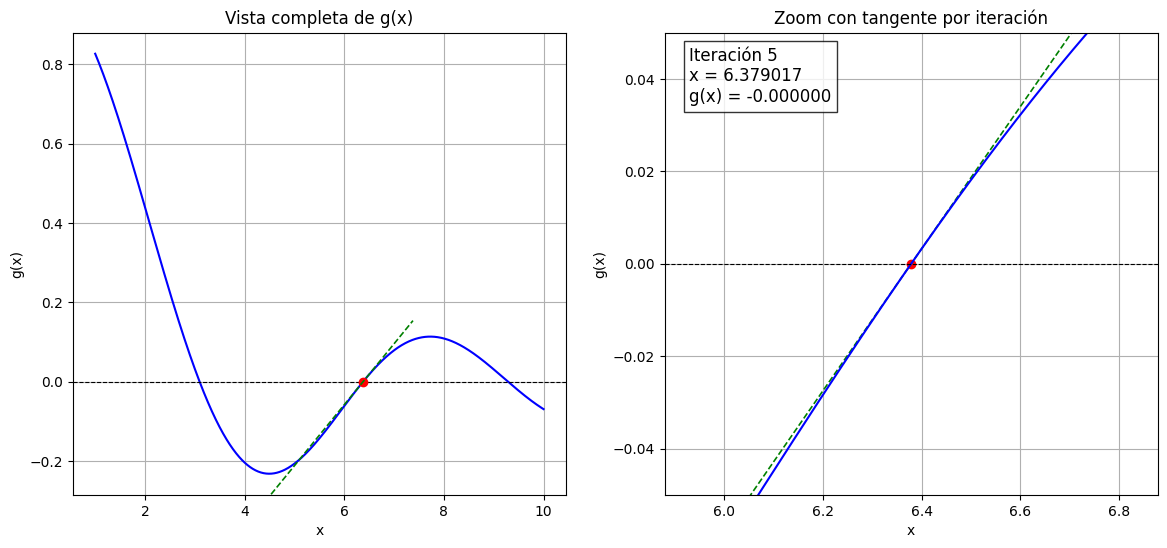

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.optimize import newton

# Función y derivada
def g(x):
    return np.sin(x) / x - 0.015

def g_prime(x):
    return (x * np.cos(x) - np.sin(x)) / (x**2)

# Registro de valores de g(x)
valores_gx = []
def g_with_output(x):
    val = g(x)
    valores_gx.append(val)
    return val

# Newton-Raphson
x0 = 5
xT, info = newton(g_with_output, x0, fprime=g_prime, full_output=True)

# Aproximaciones manuales
x_vals = [x0]
for i in range(1, len(valores_gx)):
    prev_x = x_vals[-1]
    next_x = prev_x - valores_gx[i-1] / g_prime(prev_x)
    x_vals.append(next_x)

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- Vista completa ---
x_full = np.linspace(1, 10, 1000)
y_full = g(x_full)
ax1.plot(x_full, y_full, label="g(x)", color="blue")
ax1.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax1.set_title("Vista completa de g(x)")
ax1.set_xlabel("x")
ax1.set_ylabel("g(x)")
ax1.grid(True)
point_full, = ax1.plot([], [], 'ro')
tangent_full, = ax1.plot([], [], 'g--', linewidth=1.2)  # ← Tangente para vista completa

# --- Vista de zoom dinámico ---
point_zoom, = ax2.plot([], [], 'ro')
tangent_zoom, = ax2.plot([], [], 'g--', linewidth=1.2)
func_zoom, = ax2.plot([], [], 'b-', linewidth=1.5)
text = ax2.text(0.05, 0.85, '', transform=ax2.transAxes, fontsize=12,
                bbox=dict(facecolor='white', alpha=0.8))
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax2.set_title("Zoom con tangente por iteración")
ax2.set_xlabel("x")
ax2.set_ylabel("g(x)")
ax2.grid(True)

# Inicialización
def init():
    point_full.set_data([], [])
    point_zoom.set_data([], [])
    tangent_full.set_data([], [])
    tangent_zoom.set_data([], [])
    func_zoom.set_data([], [])
    text.set_text('')
    return point_full, point_zoom, tangent_full, tangent_zoom, func_zoom, text

# Actualización por iteración
def update(i):
    if i >= len(x_vals):
        return point_full, point_zoom, tangent_full, tangent_zoom, func_zoom, text

    x = x_vals[i]
    y = g(x)
    slope = g_prime(x)

    # Tangente (compartida en ambas vistas)
    x_tan = np.linspace( - 1, x + 1, 100)
    y_tan = y + slope * (x_tan - x)

    # Vista completa
    point_full.set_data([x], [y])
    tangent_full.set_data(x_tan, y_tan)

    # Vista de zoom
    point_zoom.set_data([x], [y])
    x_zoom = np.linspace(x - 0.5, x + 0.5, 500)
    y_zoom = g(x_zoom)
    func_zoom.set_data(x_zoom, y_zoom)
    tangent_zoom.set_data(x_tan, y_tan)

    ax2.set_xlim(x - 0.5, x + 0.5)
    ax2.set_ylim(y - 0.05, y + 0.05)
    text.set_text(f'Iteración {i}\nx = {x:.6f}\ng(x) = {y:.6f}')
    return point_full, point_zoom, tangent_full, tangent_zoom, func_zoom, text

# Animación
ani = FuncAnimation(fig, update, frames=len(x_vals), init_func=init,
                    interval=1000, blit=True, repeat=False)

# Guardar como GIF
ani.save("newton_method_dual_view_with_full_tangent.gif", writer=PillowWriter(fps=1))

print("✅ GIF guardado como: newton_method_dual_view_with_full_tangent.gif")
print(f"Valor final x_T: {xT:.8f}")
